# importing libraries and dataset from kaggle

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
! pip install kaggle


In [3]:
! mkdir ~/.kaggle


In [4]:
! cp ///content/kaggle.json ~/.kaggle/


In [5]:
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets download niloy333/kuhar

 97% 446M/460M [00:05<00:00, 101MB/s] 
100% 460M/460M [00:05<00:00, 86.5MB/s]


In [7]:
! unzip kuhar.zip



Archive:  kuhar.zip
  inflating: 1.Raw_time_domian_data/0.Stand/1001_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1002_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1002_A_6.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1003_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1004_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1005_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1006_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1007_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1008_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1008_A_6.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1009_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1010_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1011_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1013_A_1.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1013_A_1_0.csv  
  inflating: 1.Raw_time_domian_data/0.Stand/1014_A_1.csv  
  inflating: 1.Raw_time_domian_dat

In [2]:
#Reading data:
df = pd.read_csv("/content/3.Time_domain_subsamples/KU-HAR_time_domain_subsamples_20750x300.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800] #These are the time-domian subsamples (features) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800] #These are their associated class labels (classes)

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


In [3]:
signals


array([[ 4.2305e-03, -2.8038e-04, -1.3906e-02, ..., -1.6680e-02,
        -1.6650e-02, -1.3097e-02],
       [ 1.2482e-02,  3.2496e-02,  6.7856e-02, ..., -1.0394e-02,
        -8.0698e-03, -4.3542e-03],
       [ 1.2127e-02,  2.8458e-02,  6.2075e-02, ..., -4.1902e-03,
         2.1465e-04,  8.4980e-04],
       ...,
       [ 1.2695e+00,  1.3122e+00,  7.2557e-01, ...,  1.7271e-01,
        -2.8937e-03,  2.3955e-02],
       [-5.5622e+00, -2.7970e+00, -2.3533e+00, ..., -1.3196e-01,
        -1.5078e-01, -1.8732e-01],
       [ 8.3810e-01, -1.2116e+00, -5.6718e-01, ...,  1.3448e-02,
         2.7566e-02,  1.4051e-01]], dtype=float32)

In [4]:
S=df.loc[:,0:1799]
S.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
20745,1.8716,1.6488,1.60890,1.80230,1.47500,1.390700,1.13780,1.28960,0.96375,1.022200,1.74060,0.94338,2.33520,0.270580,2.211300,5.260400,2.75680,-0.55682,0.030089,-1.0348,-3.91630,-0.428170,2.51850,0.012873,1.52750,0.79911,2.12170,2.156800,1.470100,2.870300,2.36800,-0.85092,-1.33580,0.35271,1.25510,0.443930,0.38259,1.30750,-0.70573,-1.12010,...,0.580470,0.542080,0.493850,0.393570,0.371170,0.249590,0.12527,0.099327,0.052213,0.034262,-0.012411,-0.032257,-0.084295,-0.126360,-0.105460,-0.063783,-0.048431,0.007495,0.035550,-0.129900,-0.308940,-0.376050,-0.528120,-0.564250,-0.52832,-0.480580,-0.441880,-0.37032,-0.371580,-0.398040,-0.410590,-0.480470,-0.53814,-0.49764,-0.43259,-0.414760,-0.363110,-0.329190,-0.460960,-0.621920
20746,1.8894,2.0227,0.81730,-0.50584,2.46220,3.814200,2.66100,2.65120,1.99140,4.427300,5.97110,3.24850,-1.14490,0.969250,-2.483300,-2.474500,-0.50089,-0.67807,-0.670580,1.3354,1.17150,0.858140,1.25750,2.007100,2.55880,1.94730,0.30066,0.207740,-0.014855,-0.711390,0.67138,1.77520,2.19880,-1.38070,-1.10590,-0.653960,-2.11740,-1.53350,1.36240,1.41820,...,1.096100,1.055700,1.103000,1.147400,1.155100,1.172700,1.16890,1.125200,1.098700,1.051600,0.934530,0.807510,0.716730,0.701160,0.542750,0.357710,0.310080,0.218620,0.190570,0.124570,0.095531,0.024546,-0.048593,-0.058614,-0.07886,-0.078623,-0.044195,-0.01908,0.004026,0.042637,0.016722,-0.075675,-0.10947,-0.20882,-0.28893,-0.320880,-0.379540,-0.408210,-0.507970,-0.548040
20747,1.2695,1.3122,0.72557,0.53129,0.95842,-0.049679,1.22310,1.83700,0.98974,1.882600,1.52290,0.93061,1.02760,1.982500,3.348100,2.227100,3.39150,2.86490,2.869600,2.6779,2.44240,3.064200,2.31990,3.609000,3.83440,2.19360,2.12850,1.561900,0.703020,0.823440,0.26217,-0.16012,0.25418,1.58430,0.97928,2.240200,2.59830,1.22350,0.64076,0.74475,...,0.023307,-0.037959,-0.277510,-0.371250,-0.345060,-0.330770,-0.21027,0.062868,0.132020,0.261250,0.325100,0.598000,0.898440,0.953460,1.062500,1.064600,0.832470,0.655370,0.760180,0.914940,1.002100,1.312000,1.446400,1.776700,2.09170,2.071300,2.026300,1.98560,1.765800,1.632900,1.550500,1.431600,1.38280,1.21850,1.12540,0.639470,0.277320,0.172710,-0.002894,0.023955
20748,-5.5622,-2.7970,-2.35330,-3.07560,-4.13610,-4.028800,-0.58026,0.34607,-2.63170,-2.790000,-2.86780,-2.99570,-3.37690,0.215840,0.698770,0.415250,-0.61255,-0.88968,-1.061200,-1.3126,-0.01512,0.089774,-0.24168,1.058800,0.90355,-0.79466,-1.52990,-0.024145,1.350500,-0.008132,0.94737,0.70096,0.32479,0.44440,0.52502,-0.048851,-0.02038,1.67740,0.96095,2.23280,...,-0.007757,0.025042,0.085200,0.061767,-0.037103,-0.072374,-0.21798,-0.356640,-0.338910,-0.314310,-0.302230,-0.229460,-0.190910,-0.244400,-0.302090,-0.336110,-0.437610,-0.464300,-0.420880,-0.389260,-0.366260,-0.323830,-0.326010,-0.346490,-0.35674,-0.423260,-0.477130,-0.50671,-0.564420,-0.573600,-0.573510,-0.572520,-0.43918,-0.24667,-0.20902,-0.128670,-0.104730,-0.131960,-0.150780,-0.187320
20749,0.8381,-1.2116,-0.56718,-0.55532,-0.64496,-0.232160,0.36707,-0.04070,0.18598,-0.009721,0.45146,0.58319,0.27811,0.081182,0.088696,0.005247,-0.76956,1.10330,1.791200,0.8767,0.90174,1.087300,-0.23316,-0.927400,-0.13343,0.90689,0.42443,-0.549070,-0.196810,-0.178550,-0.64507,-0.38725,0.34841,-0.12315,0.24493,0.004159,-0.14166,-0.25646,-0.21177,0.15912,...,0.088564,0.073222,0.068326,0.132570,0.196980,0.212090,0.24646,0.253720,0.248840,0.245950,0.214700,0.170780,0.132610,0.018233,-0.019218,-0.116120,-0.199030,-0.157660,-0.076229,-0.039824,0.071249,0.116760,0.167410,0.222620,0.21971,0.201280,0.202320,0.25659,0.297490,0.319670,0.367400,0.353460,0.29081,0.26162,0.11912,0.004095,0.006755,0.013448,0.027566,0.140510


In [5]:
L=df.loc[:,1800]
L.tail()

20745    9
20746    9
20747    9
20748    9
20749    9
Name: 1800, dtype: int64

In [6]:
dff.shape

(20750, 1803)

In [7]:
fft = np.zeros(signals.shape, dtype=np.float32)
for i in range(0,len(signals)):
    for j in range(0, 6):
        tmp = np.fft.fft(signals[i, j*300:(j+1)*300])
        fft[i, j*300:(j+1)*300] = abs(tmp)
        
print(fft.shape)

(20750, 1800)


#FS

In [8]:
X_train, X_test, y_train, y_test=train_test_split(fft,labels, test_size=0.3, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(14525, 1800)
(6225, 1800)


#Removing Constant features // NOTHING TO REMOVE

In [9]:
S_train, S_test, L_train, L_test=train_test_split(S,L, test_size=0.3, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(14525, 1800)
(6225, 1800)


In [19]:
print(L_train.shape)
print(L_test.shape)

(14525,)
(6225,)


In [20]:
L_train

5924     12
16033     5
929       0
15644     5
12785     4
         ..
11265     3
4151     10
15738     5
12446     3
1892      1
Name: 1800, Length: 14525, dtype: int64

using VarianceThreshold

In [7]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(S_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in S_train.columns
                    if column not in S_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

NameError: ignored

In [ ]:
data_cons = df.drop(constant_columns,axis=1)
data_cons.shape

# Removing Quasi-Constant Features // NOTHING TO REMOVE

In [44]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(S_train)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in S_train.columns
                    if column not in S_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(14525, 1800)
0


In [46]:
data_qcons = df.drop(qcons_columns,axis=1)
data_qcons.shape

(20750, 1803)

# Correlation of Features with the Target Variable

To Identify input features(S) having a high correlation with the target variable(L). Here we print the correlation of each of the input features with the target variable.

In [49]:
imp = S.apply(lambda x: x.corr(L))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])     #Sorted in ascending order

0      -0.021153
1      -0.021157
2      -0.021150
3      -0.021150
4      -0.021152
          ...   
1795    0.074451
1796    0.074453
1797    0.074454
1798    0.074454
1799    0.074454
Length: 1800, dtype: float64
0        856
1        857
2        848
3        849
4        854
        ... 
1795    1760
1796    1756
1797    1757
1798    1758
1799    1759
Length: 1800, dtype: int64
856    -0.080423
857    -0.080421
848    -0.080418
849    -0.080415
854    -0.080414
          ...   
1760    0.074461
1756    0.074462
1757    0.074462
1758    0.074463
1759    0.074463
Length: 1800, dtype: float64


Shown Below is the correlation of each S feature with our L variable(TARGET)

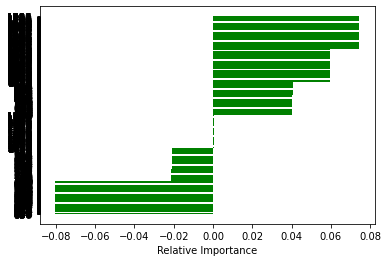

In [67]:
import matplotlib.pyplot as plt

names=np.arange(1801)

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We want to keep features with only **a high correlation** with the target variable. This implies that the input feature has a high influence in predicting the target variable.
We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4
The correlation threshold value to determine highly collinear variables should be ± 0.50 or near that. Will take the absolute value as both negative and positive correlation matters.

the highest correlation is .08

those are the important features according to this method

In [77]:
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.08:
        print(names[i])

600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849


# Correlation with Other Variables

To Identify input features that have **a low correlation with other independent variables**. Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features. We will keep input features that are not highly correlated with other input features(one of them is enough)

In [78]:
for i in range(0,len(S.columns)):
    for j in  range(0,len(S.columns)):
        if i!=j:
            corr_1=np.abs(S[S.columns[i]].corr(S[S.columns[j]]))
            if corr_1 <0.3:
                print( S.columns[i] , " is not correlated  with ", S.columns[j])
            elif corr_1>0.75:
                print( S.columns[i] , " is highly  correlated  with ", S.columns[j])

Streaming output truncated to the last 5000 lines.
1794  is highly  correlated  with  694
1794  is highly  correlated  with  695
1794  is highly  correlated  with  696
1794  is highly  correlated  with  697
1794  is highly  correlated  with  698
1794  is highly  correlated  with  699
1794  is highly  correlated  with  700
1794  is highly  correlated  with  701
1794  is highly  correlated  with  702
1794  is highly  correlated  with  703
1794  is highly  correlated  with  704
1794  is highly  correlated  with  705
1794  is highly  correlated  with  706
1794  is highly  correlated  with  707
1794  is highly  correlated  with  708
1794  is highly  correlated  with  709
1794  is highly  correlated  with  710
1794  is highly  correlated  with  711
1794  is highly  correlated  with  712
1794  is highly  correlated  with  713
1794  is highly  correlated  with  714
1794  is highly  correlated  with  715
1794  is highly  correlated  with  716
1794  is highly  correlated  with  717
1794  is high

In [ ]:
S_train.corr()

In [10]:
S_train.shape

(14525, 1800)

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = S_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(S_train, 0.95)
len(set(corr_features))

1794

In [51]:
corr_features

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [52]:
FS_S_train=S_train.drop(corr_features,axis=1)
FS_S_test=S_test.drop(corr_features,axis=1)

In [53]:
FS_S_train

,0,300,600,900,1200,1500
5924,-1.065600,0.197100,-1.159700,-0.299270,-0.057681,-0.331850
16033,0.013450,-0.000596,0.000864,0.007410,0.030026,-0.002893
929,0.015976,-0.001124,-0.017249,0.012238,-0.006762,0.005704
15644,0.015159,-0.005605,0.015929,0.000031,0.017410,0.001511
12785,2.741600,0.474540,-1.049600,0.392350,-0.678960,-0.413450
...,...,...,...,...,...,...
11265,-0.248890,-0.907660,-0.333840,1.129800,0.135300,0.133670
4151,-0.212690,0.153300,-0.477520,-0.009219,0.402980,0.096944
15738,-0.016038,0.061365,-0.037251,-0.007637,-0.016568,0.002017
12446,-0.221200,-0.522030,-1.760300,-1.192300,0.187070,0.150220


# testing model (features correlation>.95=.48) 

In [56]:
# Classifying HAR samples:

lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(FS_S_train,  L_train)
accuracy_r = lr_r.score(FS_S_test, L_test)

In [57]:
# Showing results:

print('Classification Accuracy: ',accuracy_r)
L_pred=lr_r.predict(FS_S_test)
print('\nConfusion Report: ') 
print(classification_report(L_test, L_pred))

Classification Accuracy:  0.4878714859437751

Confusion Report: 
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       566
           1       0.56      0.70      0.62       562
           2       0.54      0.58      0.56       539
           3       0.50      0.69      0.58       560
           4       0.48      0.63      0.54       653
           5       0.64      0.51      0.56       544
           6       0.47      0.44      0.45       529
           7       0.31      0.27      0.29       400
           8       0.55      0.45      0.49       200
           9       0.51      0.28      0.37       144
          10       0.51      0.38      0.44       302
          11       0.36      0.38      0.37       265
          12       0.00      0.00      0.00        95
          13       0.25      0.06      0.10        78
          14       0.61      0.57      0.59       178
          15       0.27      0.26      0.26       239
          16    

# percentile

In [101]:
from sklearn.feature_selection import SelectPercentile

In [103]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(S_train.fillna(0), L_train)
mutual_info

array([0.58533279, 0.58595641, 0.58578777, ..., 0.59422162, 0.60578401,
       0.61555705])

In [104]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = S_train.columns
mutual_info.sort_values(ascending=False)

173     0.660702
109     0.660661
210     0.659442
190     0.659329
95      0.658859
          ...   
1206    0.532000
1218    0.530245
1204    0.530145
1205    0.528476
1201    0.520450
Length: 1800, dtype: float64

In [105]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(S_train.fillna(0), L_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f1506041170>)

In [114]:
S_train.columns[selected_top_columns.get_support()].values

array([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  2

In [113]:
LL

array([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  2

In [108]:
ss=S_train.columns[sel_five_cols.get_support()].values
ss

array([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  2

# Finding Mutual Information or Information Gain

In [58]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(S_train, L_train)
mutual_info

array([0.59433239, 0.5948125 , 0.59485798, ..., 0.60246622, 0.61283454,
       0.62146036])

In [59]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = S_train.columns
mutual_info.sort_values(ascending=False)

173     0.670161
109     0.669581
190     0.668475
210     0.668169
95      0.667585
          ...   
1206    0.540766
1218    0.539544
1204    0.539273
1205    0.537979
1201    0.529661
Length: 1800, dtype: float64

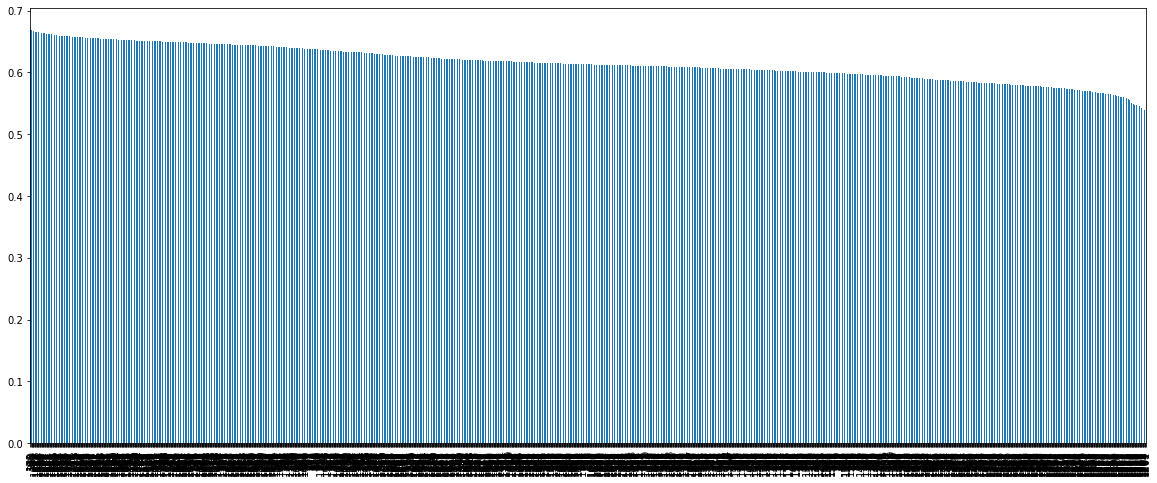

In [60]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [61]:
from sklearn.feature_selection import SelectKBest


In [73]:
#Now we Will select the  top 360 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=360)
sel_five_cols.fit(S_train, L_train)
S_train.columns[sel_five_cols.get_support()]

Int64Index([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,
            ...
            1183, 1184, 1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195],
           dtype='int64', length=360)

In [97]:
IG_S_train=S_train[[31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  237,  239,  240,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  258,  259,  261,
        266,  275,  296,  923,  938,  941,  944,  954,  956,  957,  958,
        959,  960,  961,  962,  964,  965,  968,  969,  970,  976,  980,
        981,  982,  984,  985,  990,  993,  994,  995,  997,  998,  999,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012,
       1013, 1015, 1016, 1017, 1019, 1020, 1022, 1023, 1024, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049,
       1050, 1051, 1052, 1053, 1054, 1055, 1057, 1058, 1059, 1060, 1061,
       1062, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1080, 1081, 1082, 1083, 1086, 1087, 1088,
       1089, 1090, 1092, 1093, 1094, 1095, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1111, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1128,
       1129, 1130, 1132, 1133, 1134, 1136, 1138, 1139, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1165, 1166, 1167, 1170,
       1171, 1172, 1173, 1174, 1176, 1177, 1180, 1181, 1182, 1183, 1184,
       1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195]]

In [96]:
ss=S_train.columns[sel_five_cols.get_support()].values
ss

array([  31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  2

In [98]:
IG_S_test=S_test[[31,   48,   53,   57,   58,   59,   60,   61,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   78,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   91,   93,   94,   95,   96,
         97,   98,   99,  100,  101,  102,  103,  104,  108,  109,  110,
        116,  117,  118,  119,  120,  121,  122,  123,  125,  126,  129,
        130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  144,  145,  146,  148,  149,  150,  151,  154,  156,
        157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,
        179,  180,  181,  182,  183,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  209,  210,  211,  212,
        213,  214,  215,  216,  217,  219,  220,  221,  222,  224,  226,
        227,  228,  229,  230,  231,  232,  234,  237,  239,  240,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  258,  259,  261,
        266,  275,  296,  923,  938,  941,  944,  954,  956,  957,  958,
        959,  960,  961,  962,  964,  965,  968,  969,  970,  976,  980,
        981,  982,  984,  985,  990,  993,  994,  995,  997,  998,  999,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012,
       1013, 1015, 1016, 1017, 1019, 1020, 1022, 1023, 1024, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049,
       1050, 1051, 1052, 1053, 1054, 1055, 1057, 1058, 1059, 1060, 1061,
       1062, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1080, 1081, 1082, 1083, 1086, 1087, 1088,
       1089, 1090, 1092, 1093, 1094, 1095, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1111, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1128,
       1129, 1130, 1132, 1133, 1134, 1136, 1138, 1139, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1165, 1166, 1167, 1170,
       1171, 1172, 1173, 1174, 1176, 1177, 1180, 1181, 1182, 1183, 1184,
       1185, 1186, 1188, 1189, 1190, 1193, 1194, 1195]]

# Testing model on IG (360=.708)

In [99]:
# Classifying HAR samples:

lr_r = RandomForestClassifier(n_estimators=300, max_features='sqrt')
lr_r.fit(IG_S_train,  L_train)
accuracy_r = lr_r.score(IG_S_test, L_test)

In [100]:
# Showing results:

print('Classification Accuracy: ',accuracy_r)
L_pred=lr_r.predict(IG_S_test)
print('\nConfusion Report: ') 
print(classification_report(L_test, L_pred))

Classification Accuracy:  0.7082730923694779

Confusion Report: 
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       566
           1       0.75      0.77      0.76       562
           2       0.79      0.74      0.77       539
           3       0.67      0.83      0.74       560
           4       0.67      0.96      0.79       653
           5       0.73      0.60      0.66       544
           6       0.72      0.65      0.68       529
           7       0.56      0.80      0.66       400
           8       0.93      0.95      0.94       200
           9       0.98      0.28      0.43       144
          10       0.79      0.27      0.40       302
          11       0.70      0.87      0.78       265
          12       1.00      0.05      0.10        95
          13       0.73      0.58      0.64        78
          14       0.90      0.96      0.93       178
          15       0.62      0.48      0.54       239
          16    

# CHI (NOT WORKING)

In [119]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [120]:
f_p_values

(array([2.92065955e+10, 9.06499908e+08, 4.34973634e+08, ...,
        1.48150729e+08, 2.24856628e+08, 4.60773368e+08]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [121]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=S_train.columns
p_values

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1795    0.0
1796    0.0
1797    0.0
1798    0.0
1799    0.0
Length: 1800, dtype: float64

In [122]:
p_values.sort_index(ascending=False)


1799    0.0
1798    0.0
1797    0.0
1796    0.0
1795    0.0
       ... 
4       0.0
3       0.0
2       0.0
1       0.0
0       0.0
Length: 1800, dtype: float64

#pca

In [126]:

from sklearn.decomposition import PCA

In [123]:
SS=S.values

In [124]:
LL=L.values

In [131]:
pca = PCA(n_components=3)
fit = pca.fit(SS)
print(fit.explained_variance_ratio_)
print(fit.components_)

[0.46660311 0.37441505 0.11439386]
[[-0.02445032 -0.02445234 -0.02445422 ...  0.02339032  0.02338899
   0.0233876 ]
 [ 0.02069575  0.02069503  0.02069404 ...  0.01026915  0.01026864
   0.01026814]
 [-0.04487265 -0.04487525 -0.04487772 ...  0.00541663  0.00541779
   0.00541908]]


# ExtraTreeClassifier

In [132]:
from sklearn.ensemble import ExtraTreesClassifier


In [133]:
model = ExtraTreesClassifier()
model.fit(SS, LL)
print(model.feature_importances_)

[0.00066399 0.00039724 0.00041211 ... 0.00054803 0.00061366 0.00036991]


In [143]:
sorted=np.sort(model.feature_importances_)


In [144]:
sorted

array([0.0003119 , 0.00031957, 0.00032313, ..., 0.00112282, 0.00124486,
       0.00133273])